In [16]:
import pandas as pd 
import matplotlib as plt

In [17]:
df = pd.read_csv("../data/brasseries.csv")
print(df.shape)
df.head(5)

(420, 8)


,name,address,place_id,rating,reviews,price_level,website,arrondissement
0,Le Petit Bouillon Pharamond,"24 Rue de la Grande Truanderie, 75001 Paris, F...",ChIJRcSln6lv5kcRlLWcSVj4QGE,4.2,5331,2.0,http://www.petitbouillonpharamond.com/,1
1,Brasserie de la Bourse,"27 Rue Jean-Jacques Rousseau, 75001 Paris, France",ChIJLTXauyNu5kcRfE2jvCNL1Is,4.4,676,2.0,http://www.brasseriedelabourseparis.com/,1
2,Brasserie Flottes,"2 Rue Cambon, 75001 Paris, France",ChIJDeI4Jx9v5kcRItEpEe0E6jo,4.5,1454,2.0,http://brasserieflottes.fr/fr,1
3,Brasserie du Louvre - Bocuse,"Place André Malraux, Paris, Île-de-France, Fra...",ChIJUZFuuSVu5kcRfY5Fd2TUlRQ,4.1,656,3.0,https://www.hyattrestaurants.com/en/dining/fra...,1
4,Brasserie l'Émil,"55 Rue Saint-Roch, 75001 Paris, France",ChIJ_xOkpDpv5kcRk_YSe4UrbkI,4.3,142,NaN,https://www.chateauvoltaire.com/restaurant,1


In [18]:
columns_to_lower = ["name", "address"]
for col in columns_to_lower:
    df[col] = df[col].apply(lambda x: x.lower() if isinstance(x, str) else x)
df.head(1)

,name,address,place_id,rating,reviews,price_level,website,arrondissement
0,le petit bouillon pharamond,"24 rue de la grande truanderie, 75001 paris, f...",ChIJRcSln6lv5kcRlLWcSVj4QGE,4.2,5331,2.0,http://www.petitbouillonpharamond.com/,1


## How many locations have the name 'Bistrot' in them? 'Cafe'? 'Brasserie'?

In [19]:
count_bistrot = df['name'].str.contains("bistrot").value_counts().values[1]
print("Occurrences of 'bistrot':", count_bistrot)
count_cafe = df['name'].str.contains("cafe").value_counts().values[1]
print("Occurrences of 'cafe':", count_cafe)
count_brasserie = df['name'].str.contains("brasserie").value_counts().values[1]
print("Occurrences of 'brasserie':", count_brasserie)
count_bouillon = df['name'].str.contains("bouillon").value_counts().values[1]
print("Occurrences of 'bouillon':", count_bouillon)
count_restaurant = df['name'].str.contains("restaurant").value_counts().values[1]
print("Occurrences of 'restaurant':", count_restaurant)

Occurrences of 'bistrot': 27
Occurrences of 'cafe': 4
Occurrences of 'brasserie': 71
Occurrences of 'bouillon': 5
Occurrences of 'restaurant': 28


### Which street has the most locations?

In [20]:
def get_streetname(address):
    street = address.split(",")[0]
    street_name =  " ".join(street.split(" ")[1:])
    return street_name.strip()

In [21]:
df['street_name'] = df['address'].apply(get_streetname)

In [22]:
df.head(1)

,name,address,place_id,rating,reviews,price_level,website,arrondissement,street_name
0,le petit bouillon pharamond,"24 rue de la grande truanderie, 75001 paris, f...",ChIJRcSln6lv5kcRlLWcSVj4QGE,4.2,5331,2.0,http://www.petitbouillonpharamond.com/,1,rue de la grande truanderie


In [23]:
counts = df['street_name'].value_counts()
counts

street_name
av. daumesnil          8
bd saint-germain       7
rue saint-dominique    5
av. jean jaurès        5
rue didot              4
                      ..
rue de lisbonne        1
rue marbeuf            1
intérieure             1
pl. des ternes         1
rue lamartine          1
Name: count, Length: 309, dtype: int64

## Reviews | rating ratios

AttributeError: module 'matplotlib' has no attribute 'xlabel'

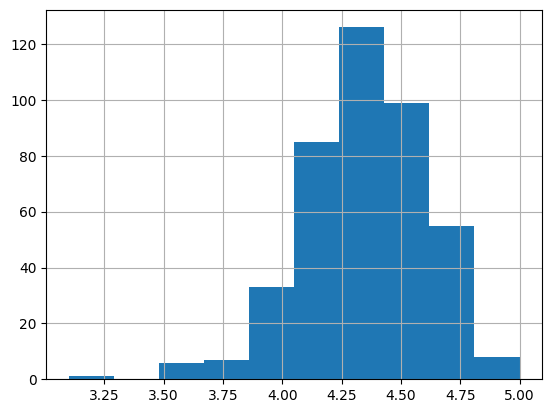

In [25]:
df['rating'].hist()
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Distribution of rating')

<Axes: >

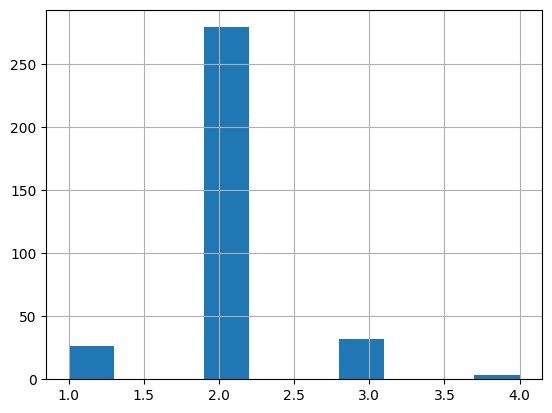

In [26]:
df['price_level'].hist()

In [27]:
df['arrondissement'].value_counts()

arrondissement
1     40
2     21
10    21
4     20
13    20
5     20
7     20
6     20
8     20
9     20
11    20
12    20
17    20
14    20
15    20
16    20
20    20
19    20
3     19
18    19
Name: count, dtype: int64

In [28]:
df['website'].isna().value_counts()

website
False    365
True      55
Name: count, dtype: int64

In [29]:
to_vist = df[df['website'].isna()].reset_index()

In [32]:
df['website'].dropna().to_list()

['http://www.petitbouillonpharamond.com/',
 'http://www.brasseriedelabourseparis.com/',
 'http://brasserieflottes.fr/fr',
 'https://www.hyattrestaurants.com/en/dining/france/paris/french-restaurant-in-avenue-de-l-opera-brasserie-du-louvre',
 'https://www.chateauvoltaire.com/restaurant',
 'https://www.privateaser.com/lieu/49884-choubichou',
 'https://www.pieddecochon.com//?utm_source=Google&utm_medium=GMB&utm_campaign=PDC&y_source=1_MTE2NjUxNzQtNzE1LWxvY2F0aW9uLndlYnNpdGU%3D',
 'https://foodcourtrivoli.fr/fr/restaurant-french-beer-brasserie/',
 'http://www.cafeplume-paris.fr/',
 'http://www.cafe-josephineparis.fr/',
 'https://www.facebook.com/Le-Reynou-1560153544244921/',
 'http://loup-paris.com/',
 'http://www.paris-bistro.com/choisir/paris1/bistrot-des-victoires',
 'https://lebaltard.com/',
 'http://www.restaurantchouchouparis.fr/',
 'https://www.au-vieux-comptoir.com/',
 'https://bistrot-valois-paris.com/fr',
 'https://menuonline.fr/cafedelaregencebis/coordonnees',
 'https://www.auch

In [41]:
privateaser = df.dropna()[df['website'].dropna().str.contains("private")]
print(privateaser.shape)
privateaser.head(3)

(10, 9)


/tmp/ipykernel_47541/3002880407.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  privateaser = df.dropna()[df['website'].dropna().str.contains("private")]


,name,address,place_id,rating,reviews,price_level,website,arrondissement,street_name
5,le choubichou paris châtelet,"5 rue mondétour, 75001 paris, france",ChIJF50yHBlu5kcRgd3blpdh-WM,4.3,1119,3.0,https://www.privateaser.com/lieu/49884-choubichou,1,rue mondétour
58,la cantine des pieds nickelés,"120 rue st denis, 75002 paris, france",ChIJHdeFjhlu5kcRlpMTb5Z7UGI,4.5,371,2.0,https://www.privateaser.com/lieu/2597-les-pied...,2,rue st denis
70,café léonard,"57 r. de turbigo, 75003 paris, france",ChIJ65l3VAVu5kcR49Z5gr7_gL8,4.1,512,2.0,https://www.privateaser.com/lieu/11978-cafe-le...,3,r. de turbigo
